# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/Module%2011-%20PCA/python/PCA_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Unsupervised Learning: Principle Component Analysis (PCA) 

## Using pca package
pca is a python package to perform Principal Component Analysis and to create insightful plots. The core of PCA is build on **sklearn** functionality to find maximum compatibility when combining with other packages. 

for **installation**:
pip install pca

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [88]:
rand_state= 1000

In [89]:
# to install the pca package, you need to run "pip install pca" first. On Google colab, do 
# !pip install pca
from pca import pca

In [46]:
pca()

In [90]:
usarrest = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/USArrests.csv')
usarrest.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [91]:
X= usarrest.drop('state', axis=1) # scaling the features will be automatically done. 
states = usarrest.state

In [92]:
model=pca(n_components=4, normalize=True) 

In [93]:
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [94]:
results

{'loadings':        Murder   Assault  UrbanPop      Rape
 PC1  0.535899  0.583184  0.278191  0.543432
 PC2  0.418181  0.187986 -0.872806 -0.167319
 PC3 -0.341233 -0.268148 -0.378016  0.817778
 PC4  0.649228 -0.743407  0.133878  0.089024,
 'PC':          PC1       PC2       PC3       PC4
 0   0.985566  1.133392 -0.444269  0.156267
 1   1.950138  1.073213  2.040003 -0.438583
 2   1.763164 -0.745957  0.054781 -0.834653
 3  -0.141420  1.119797  0.114574 -0.182811
 4   2.523980 -1.542934  0.598557 -0.341996
 5   1.514563 -0.987555  1.095007  0.001465
 6  -1.358647 -1.088928 -0.643258 -0.118469
 7   0.047709 -0.325359 -0.718633 -0.881978
 8   3.013042  0.039229 -0.576829 -0.096285
 9   1.639283  1.278942 -0.342460  1.076797
 10 -0.912657 -1.570460  0.050782  0.902807
 11 -1.639800  0.210973  0.259801 -0.499104
 12  1.378911 -0.681841 -0.677496 -0.122021
 13 -0.505461 -0.151563  0.228055  0.424666
 14 -2.253646 -0.104054  0.164564  0.017556
 15 -0.796881 -0.270165  0.025553  0.206496
 16 -0.7

In [96]:
loadings=results['loadings']
loadings.T

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [97]:
scores=results['PC']
scores['lables']=states
scores.head()

,PC1,PC2,PC3,PC4,lables
0,0.985566,1.133392,-0.444269,0.156267,Alabama
1,1.950138,1.073213,2.040003,-0.438583,Alaska
2,1.763164,-0.745957,0.054781,-0.834653,Arizona
3,-0.141420,1.119797,0.114574,-0.182811,Arkansas
4,2.523980,-1.542934,0.598557,-0.341996,California


---
## Scree plot

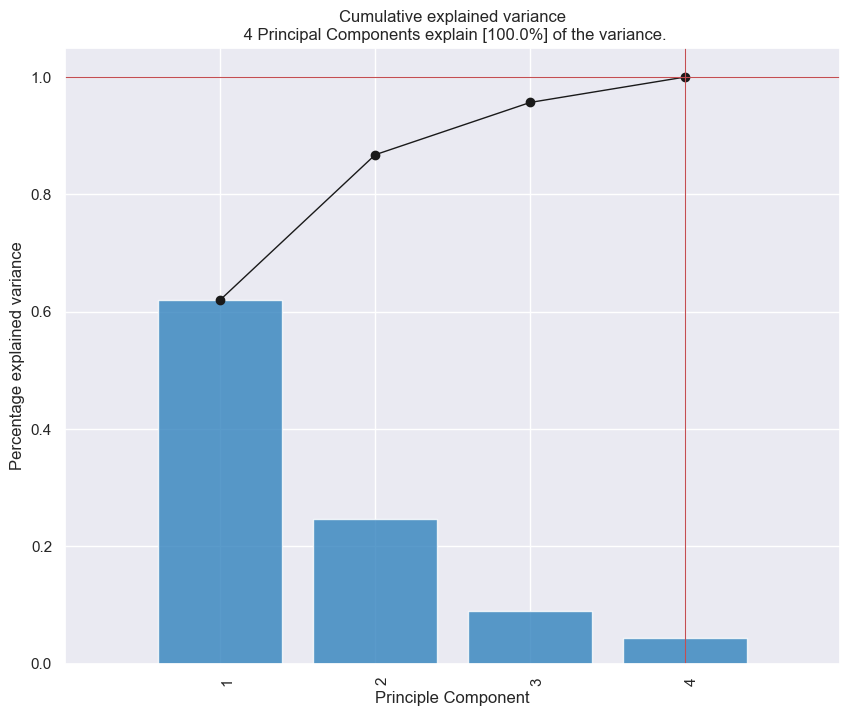

<Figure size 640x480 with 0 Axes>

In [98]:
model.plot(figsize=(10,8))
plt.show()

---
## Biplot

Biplot displays both the PC scores and PC loadings. We will use the **pca.biplot_** method from the **pca** library. 

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [50] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [50] unique colors! Available unique colors: [9].


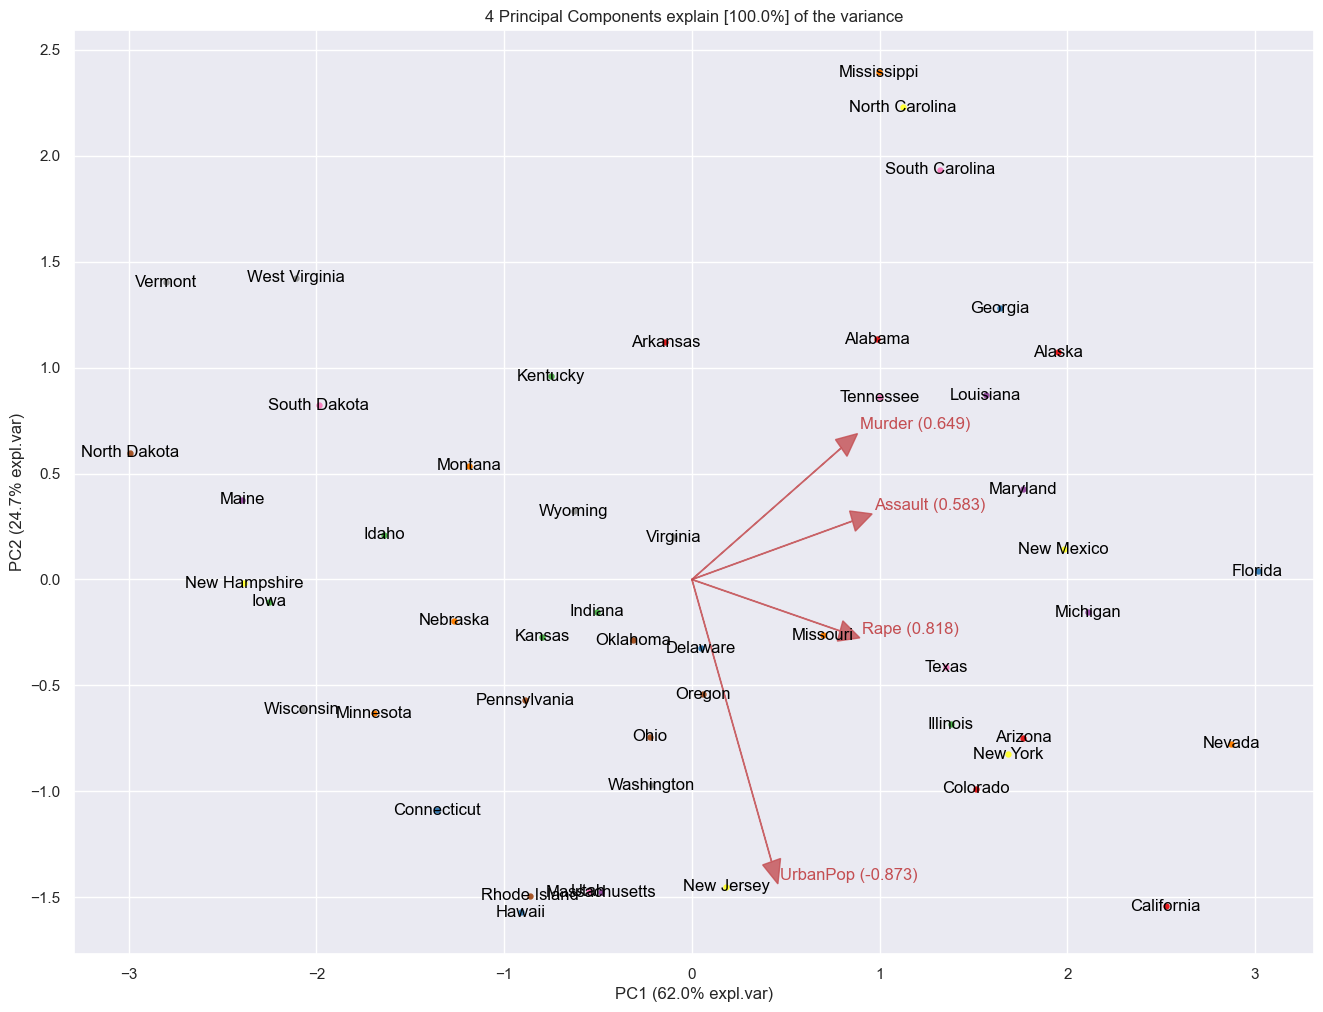

In [102]:
model.biplot(n_feat=4 , legend=False, figsize=(16,12), y=states , label=True)
plt.show()

In [101]:
loadings.T.iloc[:, range(2)]

,PC1,PC2
Murder,0.535899,0.418181
Assault,0.583184,0.187986
UrbanPop,0.278191,-0.872806
Rape,0.543432,-0.167319


--- 
## PCA application: Market Data

In [103]:
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/market_data.csv')

In [104]:
df.head()

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,72,1/31/2018,0.86,0.85,0.86,0.90,0.84,0.01,0.17,0.09,...,0.54,0.85,1.00,0.99,0.22,0.83,-0.022,-0.078,0.001,0.000
1,78,1/31/2018,0.66,0.67,0.66,0.37,0.92,0.01,0.25,0.58,...,0.27,0.65,1.00,1.00,0.04,0.17,0.006,0.047,0.264,0.000
2,465,1/31/2018,0.57,0.65,0.64,0.71,0.18,0.01,0.35,0.46,...,0.18,0.61,1.00,1.00,0.99,1.00,0.033,0.095,0.393,-0.502
3,486,1/31/2018,0.48,0.52,0.50,0.36,0.30,0.01,0.81,0.81,...,0.70,0.85,0.99,0.99,0.96,0.98,-0.139,0.146,0.030,-0.463
4,552,1/31/2018,0.88,0.87,0.87,0.88,0.75,0.01,0.81,0.77,...,0.64,0.81,0.99,0.99,0.92,0.74,-0.044,-0.307,-0.349,-0.403


In [105]:
df.shape

(4451, 99)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451 entries, 0 to 4450
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stock_id                        4451 non-null   int64  
 1   date                            4451 non-null   object 
 2   Advt_12M_Usd                    4451 non-null   float64
 3   Advt_3M_Usd                     4451 non-null   float64
 4   Advt_6M_Usd                     4451 non-null   float64
 5   Asset_Turnover                  4451 non-null   float64
 6   Bb_Yld                          4451 non-null   float64
 7   Bv                              4451 non-null   float64
 8   Capex_Ps_Cf                     4451 non-null   float64
 9   Capex_Sales                     4451 non-null   float64
 10  Cash_Div_Cf                     4451 non-null   float64
 11  Cash_Per_Share                  4451 non-null   float64
 12  Cf_Sales                        44

In [106]:
df.dropna(inplace=True)

In [107]:
X= df.drop(['stock_id','date'], axis=1) # scaling the features will be automatically done. 

In [108]:
model=pca(n_components=0.8, normalize=True) 

In [109]:
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [97] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [14] that covers the [80.00%] explained variance.
[pca] >The PCA reduction is performed on the [97] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[14]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [71]:
#results

In [110]:
loadings=results['loadings']
loadings

,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,Cash_Div_Cf,Cash_Per_Share,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
PC1,0.123418,0.126343,0.125503,0.020272,0.063947,0.011040,0.041722,0.022285,0.035080,0.127626,...,0.076032,0.070140,0.043927,0.045840,-0.090418,-0.095654,-0.004191,-0.006775,-0.004689,-0.001792
PC2,0.138670,0.130818,0.133819,-0.044864,0.013430,-0.048430,0.090063,0.068790,-0.033752,-0.044533,...,0.222852,0.240883,0.213707,0.195219,0.020990,0.015851,0.004126,0.007243,0.007869,0.001106
PC3,-0.124841,-0.124347,-0.125028,-0.270337,-0.046424,0.049457,-0.097445,0.015554,0.120505,-0.022217,...,0.036238,0.033167,0.033519,0.085877,-0.167333,-0.165144,0.005037,0.009049,0.018022,0.019287
PC4,0.020009,0.016622,0.017209,-0.084316,-0.015866,-0.075285,-0.164699,-0.102310,0.012749,0.153057,...,0.026350,0.043163,0.049611,0.050243,0.063363,0.064438,0.044356,0.065483,0.081798,0.055318
PC5,-0.145089,-0.163348,-0.157988,0.090045,0.002189,0.083527,0.180400,-0.036946,0.076480,0.087071,...,0.027945,0.024661,0.041025,0.070705,0.025710,0.003051,0.039454,0.059146,0.066366,0.042993
PC6,0.078594,0.058830,0.066675,0.109736,0.078342,-0.162630,-0.188042,-0.178748,0.150650,-0.115773,...,-0.043349,-0.010270,-0.013387,0.063171,0.000765,-0.022200,-0.023874,-0.026809,-0.023409,-0.018305
PC7,-0.037808,-0.025146,-0.031071,0.105944,0.045151,0.007345,0.043082,-0.093853,0.196788,0.041983,...,0.016152,0.004649,-0.005759,0.013813,-0.242937,-0.256067,-0.018137,-0.019321,-0.001715,0.015591
PC8,0.001212,0.015463,0.008946,0.016331,0.012732,-0.056523,-0.073942,-0.215970,-0.059571,0.182987,...,0.020477,0.028992,-0.036939,0.042459,0.010193,0.037241,-0.020531,-0.023922,-0.035573,-0.039172
PC9,-0.020203,-0.028523,-0.025599,0.010087,0.044469,-0.103830,0.065239,0.061256,0.080189,-0.029348,...,0.021318,0.038677,0.009645,-0.113269,-0.097302,-0.096602,0.107674,0.134668,0.159653,0.108825
PC10,-0.121696,-0.109011,-0.112914,0.135625,-0.103742,-0.239469,-0.178355,-0.163533,0.118551,-0.148085,...,-0.006968,0.077920,0.172017,0.130648,0.019990,0.056947,0.039498,0.047917,0.051496,0.036196


In [111]:
scores=results['PC']
scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,6.363602,6.173358,-2.505719,-0.046888,-3.548422,3.646388,3.239559,3.767995,0.813620,0.403473,1.583797,0.762704,-0.921196,0.122031
1,9.523135,2.507746,1.660610,0.326092,-5.300236,0.318351,-1.242024,1.599831,2.907919,-1.443255,-1.287795,-1.231103,0.402848,-2.630097
2,5.800236,1.898347,-2.195352,1.877717,-2.937161,-0.332760,-3.459275,3.265755,1.186446,1.896000,-0.379309,-1.993772,0.449148,-0.234289
3,0.715543,9.557593,-0.380253,3.213804,-1.973094,-3.231277,-0.846973,2.958357,0.090786,0.506885,-0.244402,-1.157871,-0.713828,2.488687
4,9.303851,7.762789,-2.299555,-0.555051,-0.338316,3.320722,0.365953,2.617630,1.731020,-0.664728,2.326303,-3.205116,-0.588561,0.850946


In [74]:
scores.shape

(4450, 14)

---
## Scree plot

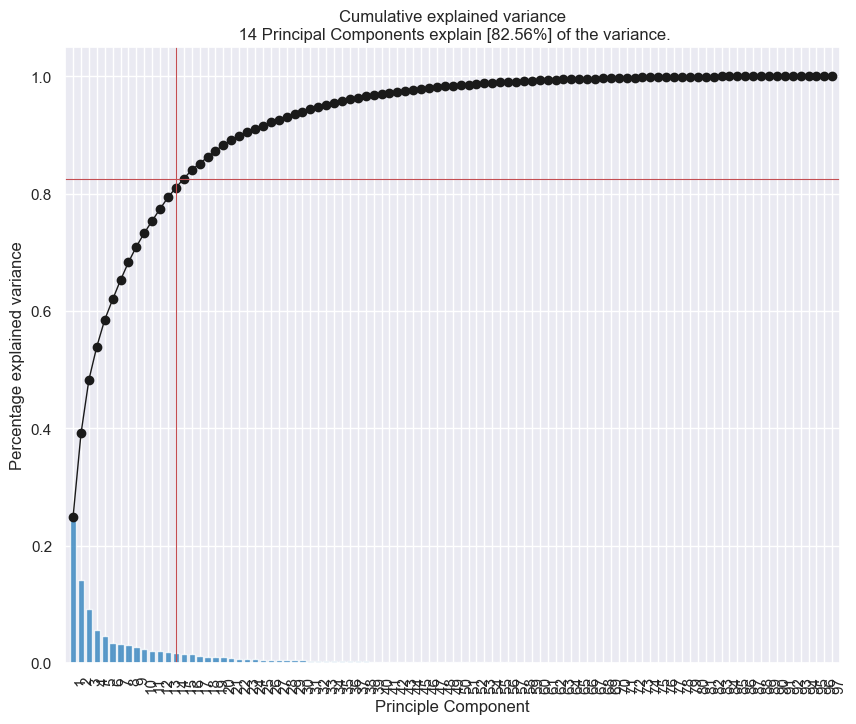

<Figure size 640x480 with 0 Axes>

In [112]:
model.plot(figsize=(10,8))
plt.show()

[pca] >Plot PC1 vs PC2 with loadings.


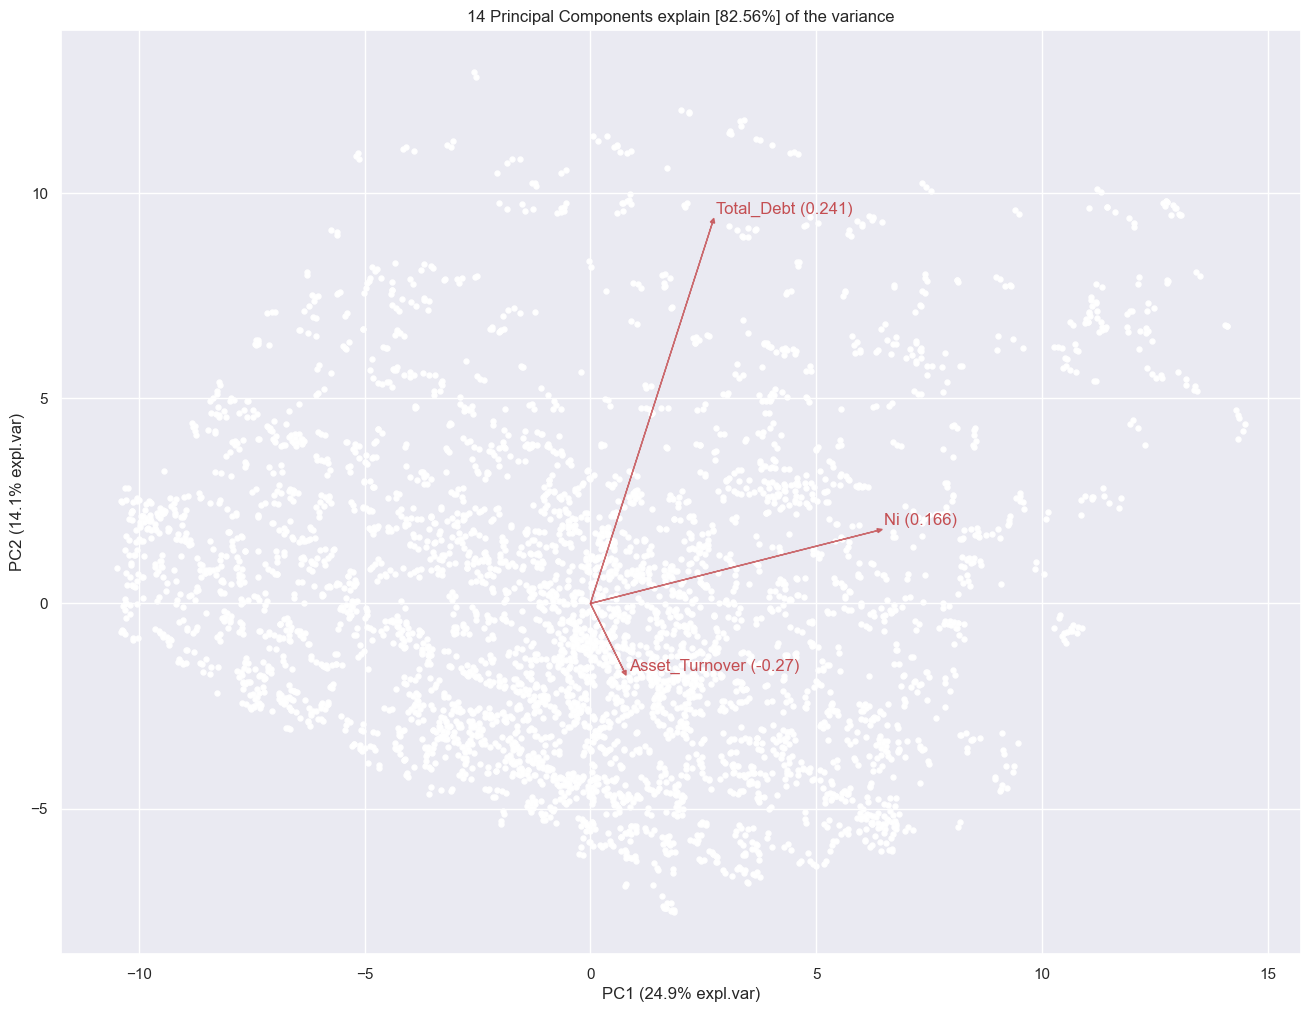

In [113]:
labels= np.array(list(itertools.repeat("No label", len(X))))
model.biplot(n_feat=3,  legend=False, figsize=(16,12), y= labels, label=False, cmap=None)
plt.show()

---
###  Additional links:
1. pca Python package documentation: https://pypi.org/project/pca/
2. PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
3. PCA visualization: https://setosa.io/ev/principal-component-analysis/
4. Kernel PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA
5. Kernel PCA visualization: https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
6. What is Singular Value Decomposition (SVD): https://www.youtube.com/watch?v=mBcLRGuAFUk